## Importing data

In [48]:
import numpy as np
import pandas as pd

In [49]:
original_accident_data = pd.read_csv('./data/Accident_Information.csv')
original_accident_data.head()

C:\Users\diaal\AppData\Local\Temp\ipykernel_9616\2942124375.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  original_accident_data = pd.read_csv('./data/Accident_Information.csv')


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


## Preprocessing

In [50]:
original_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [51]:
original_accident_data.isnull().sum()

Accident_Index                                       0
1st_Road_Class                                       0
1st_Road_Number                                      2
2nd_Road_Class                                  844272
2nd_Road_Number                                  17593
Accident_Severity                                    0
Carriageway_Hazards                            2007807
Date                                                 0
Day_of_Week                                          0
Did_Police_Officer_Attend_Scene_of_Accident        278
Junction_Control                                     0
Junction_Detail                                      0
Latitude                                           174
Light_Conditions                                     0
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
Location_Easting_OSGR                              164
Location_Northing_OSGR                             164
Longitude 

In [52]:
to_drop = ['2nd_Road_Class', 'Carriageway_Hazards', 'LSOA_of_Accident_Location', 'InScotland']
needed_features_data = original_accident_data.drop(to_drop, axis=1)

In [53]:
fillna_cols = ['Did_Police_Officer_Attend_Scene_of_Accident', 'Special_Conditions_at_Site', 'Speed_limit']
needed_features_data[fillna_cols] = needed_features_data[fillna_cols].fillna(0)

police_attend_replace_dict = {1: 0, 2: 1, 3: 1}
needed_features_data['Did_Police_Officer_Attend_Scene_of_Accident'] = needed_features_data['Did_Police_Officer_Attend_Scene_of_Accident'].replace(police_attend_replace_dict)

In [54]:
# for the remaining NA, will simply drop them
preprocessed_data = needed_features_data.dropna()
print(f"the number of null values: {preprocessed_data.isnull().sum().sum()}")

the number of null values: 0


## Clustering

In [55]:
accident = len(preprocessed_data) // 100
accident

20253

In [56]:
preprocessed_data.loc[:accident, ['Latitude', 'Longitude']]

,Latitude,Longitude
0,51.489096,-0.191170
1,51.520075,-0.211708
2,51.525301,-0.206458
3,51.482442,-0.173862
4,51.495752,-0.156618
...,...,...
20249,51.386723,-0.296823
20250,51.409728,-0.289497
20251,51.411807,-0.296466
20252,51.390304,-0.252995


In [57]:
from sklearn_extra.cluster import KMedoids

lat_lon_features = preprocessed_data.loc[:accident, ['Latitude', 'Longitude']]

k = 3
kmedoids = KMedoids(n_clusters=k, random_state=0)
clusters = kmedoids.fit_predict(lat_lon_features)

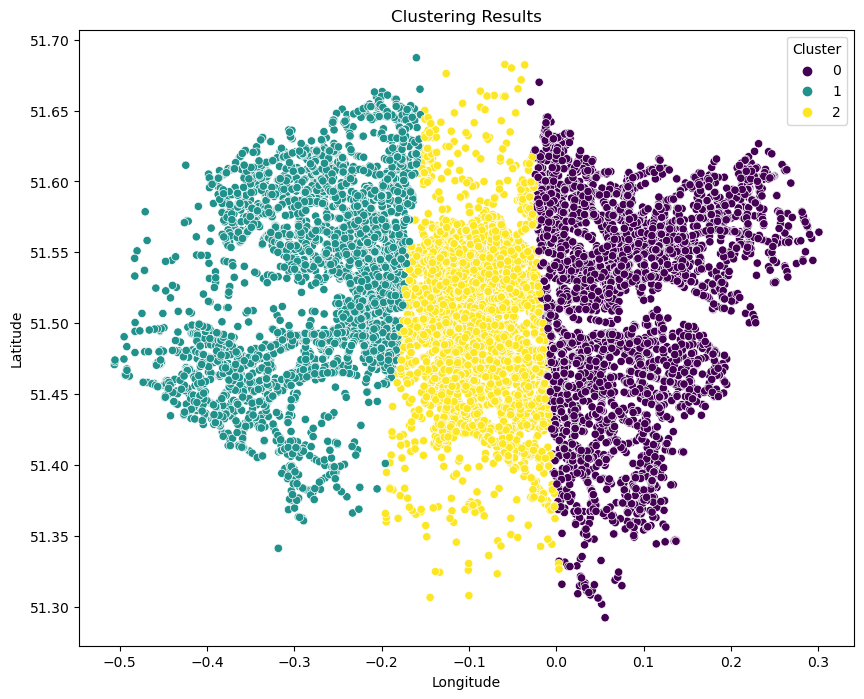

In [58]:
lat_lon_features['Cluster'] = clusters

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=lat_lon_features, palette='viridis', legend='full')
plt.title('Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()